In [311]:
from scipy.io import arff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [312]:
data = arff.loadarff('PhishingData.arff')
df = pd.DataFrame(data[0])
df = df.replace({b'1':-1, b'0': 0, b'1':1}, None)
df # 1 means legitimate, 0 suspicious and -1 means phising

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1348,-1,-1,-1,-1,-1,-1,0,1,0,1
1349,-1,0,1,0,-1,0,0,1,0,-1
1350,-1,0,-1,-1,-1,0,-1,-1,0,1
1351,0,0,1,0,0,0,-1,1,0,1


In [313]:
labels = df.Result
predictors = df.drop('Result', axis=1)

In [314]:
plot_labels = labels.replace({-1:'Phishing', 0: 'Suspicious', 1:'Trusthworthy'}, None)
plot_labels.value_counts()

Phishing        702
Trusthworthy    548
Suspicious      103
Name: Result, dtype: int64

[Text(0, 0.5, 'Count')]

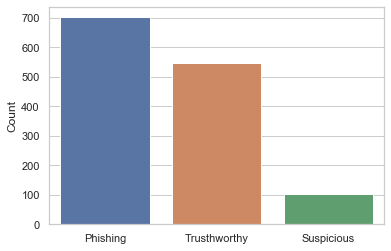

In [315]:
sns.set(style="whitegrid")
ax = sns.barplot(x=['Phishing', 'Trusthworthy', 'Suspicious'], y=plot_labels.value_counts())
ax.set(ylabel='Count')

In [316]:
# split in train and testing set
X, X_test, y, y_test = train_test_split(predictors, labels, test_size=0.2, stratify=labels, random_state=41) 

In [317]:
# baseline performance
rf = RandomForestClassifier(random_state=4)
rf.fit(X, y)
f1_score(y_test, rf.predict(X_test), average='micro') 

0.9077490774907749

In [318]:
estimators = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
gini_scores = []
entropy_scores = []

for est in estimators:
    rf_g = RandomForestClassifier(n_estimators = est, criterion = 'gini',random_state=4)
    rf_e = RandomForestClassifier(n_estimators = est, criterion = 'entropy',random_state=4)
    rf_g.fit(X, y)
    rf_e.fit(X, y)
    g_pred = rf_g.predict(X_test)
    e_pred = rf_e.predict(X_test)
    g_score = f1_score(y_test, g_pred, average='micro') 
    e_score = f1_score(y_test, e_pred, average='micro') 
    gini_scores.append(g_score)
    entropy_scores.append(e_score)    

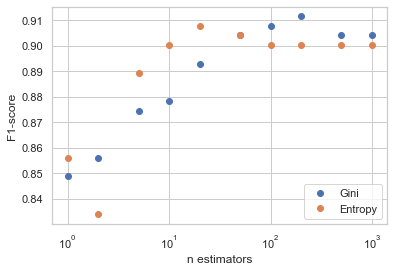

In [319]:
fig = plt.figure()
plt.plot(estimators, gini_scores, 'o', label='Gini')
plt.plot(estimators, entropy_scores, 'o', label='Entropy')
plt.xscale('log')
plt.ylabel('F1-score')
plt.xlabel('n estimators')
plt.legend(loc='lower right')

In [320]:
max_feat = [x for x in range(1,10,1)]
feat_scores = []
for feat_setting in max_feat:
    rf = RandomForestClassifier(n_estimators = 200, criterion = 'gini', max_features=feat_setting, random_state=41)
    rf.fit(X, y)
    pred = rf.predict(X_test)
    score = f1_score(y_test, pred, average='micro') 
    feat_scores.append(score)  

Text(0.5, 0, 'Maximum amount of features')

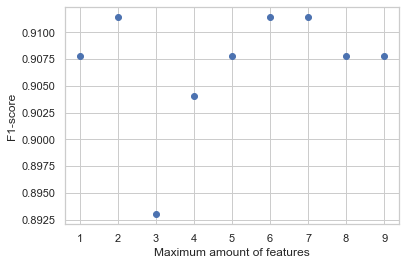

In [321]:
fig = plt.figure()
plt.plot(max_feat, feat_scores, 'o', label='d')
plt.xscale('linear')
plt.ylabel('F1-score')
plt.xlabel('Maximum amount of features')

In [322]:
rf_b = RandomForestClassifier(n_estimators = 200, criterion = 'gini', max_features=9, random_state=10)
rf_nb = RandomForestClassifier(n_estimators = 200, criterion = 'gini', max_features=9, bootstrap=False, random_state=41)
rf_b.fit(X, y)
rf_nb.fit(X, y)
pred_b = rf_b.predict(X_test)
pred_nb = rf_nb.predict(X_test)
f1_score(y_test, pred_b, average='micro')-f1_score(y_test, pred_nb, average='micro')

0.0184501845018451